In [43]:

from numpy import savetxt

import lumicks.pylake as lk
from pathlib import Path
import csv
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO 
import pylab as plb
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

# access to directory with data


In [44]:
directory = '//cmcb-files/jahnel_transitions/Mariia/miR133_223/Fd_curve_02_07_23/'
file_list = list(Path(directory).glob('*.h5'))

directory2 = '//cmcb-files/jahnel_transitions/Mariia/MIR133/'
file_list2 = list(Path(directory2).glob('*.h5'))

In [45]:
#mir223

file1 = lk.File(file_list[1])
file2 = lk.File(file_list[2])

#mir133

file7 = lk.File(file_list[3])
# file8 = lk.File(file_list[5])
app_8 = lk.File(file_list[4])
file11 = lk.File(file_list[6])
file16 = lk.File(file_list[8])
app_16 = lk.File(file_list[7])
file23 = lk.File(file_list[9])

file5 = lk.File(file_list2[0])
file9 = lk.File(file_list2[2])
app_9 = lk.File(file_list2[1])
file14 = lk.File(file_list2[3])
file15 = lk.File(file_list2[5])
app_15 = lk.File(file_list2[4])

file8 = lk.File()


In [46]:
#create list (mir133) of all files of mir133 in order like describe below (approach curve following the fd curve)

mir133 = []
ind1 = [3, 5,4, 6, 8,7, 9]
for i in ind1:
    mir133.append(lk.File(file_list[i]))

ind2 = [0, 2,1, 3, 5,4]
for i in ind2:
    mir133.append(lk.File(file_list2[i]))

In [47]:
ind = [7, 8, 'app_8', 11,16, 'app_16', 23,5,9, 'app_9', 14, 15, 'app_15']
len(ind)

13

# MIR223


In [48]:
force_2x_1 = file1['Force HF']['Force 2x']
distance_1_1 = file1['Distance']['Piezo Distance']


In [50]:

k = len(distance_1_1.data)
s = k//3+1000000
e = k - 1800000
len(distance_1_1.data)

OSError: [Errno 22] Can't synchronously read data (file read failed: time = Wed Aug 16 16:09:58 2023
, filename = '\\cmcb-files\jahnel_transitions\Mariia\miR133_223\Fd_curve_02_07_23\20230802-152912 FD Curve 1.h5', file descriptor = 3, errno = 22, error message = 'Invalid argument', buf = 000001E9BD0EC040, total read size = 1757480, bytes this sub-read = 1757480, bytes actually read = 18446744073709551615, offset = 117981)

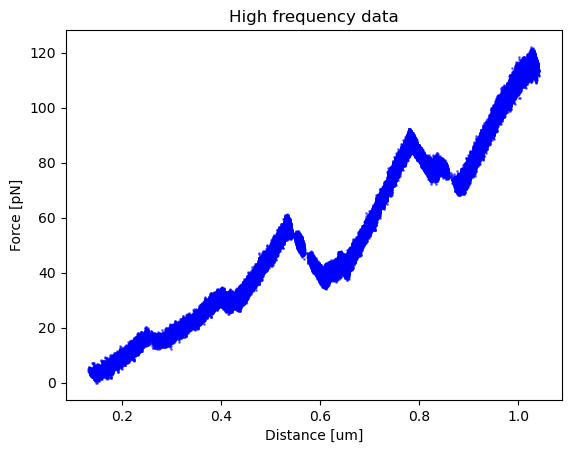

In [10]:
plt.scatter(distance_1_1.data[s:e], force_2x_1.data[s:e], s=1,  color="blue", alpha=0.5, label = 'raw data')
len(distance_1_1.data[s:e])
plt.title('High frequency data')
plt.ylabel('Force [pN]')
plt.xlabel('Distance [um]')
plt.show()

In [10]:
force_2x_2 = file2['Force HF']['Force 2x']
distance_1_2 = file2['Distance']['Piezo Distance']

In [11]:
k = len(distance_1_2.data)
s = 800000
e = k//2 +1000000
len(distance_1_2.data)

3438138

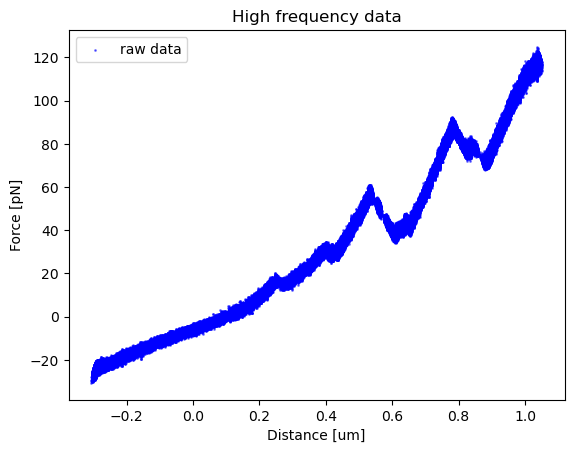

In [170]:
plt.scatter(distance_1_2.data[s:e], force_2x_2.data[s:e], s=1,  color="blue", alpha=0.5, label = 'raw data')
len(distance_1_2.data[s:e])
plt.title('High frequency data')
plt.ylabel('Force [pN]')
plt.xlabel('Distance [um]')
plt.legend()
plt.show()

# MIR133


In [27]:
f = []
d = []
for i in range(len(mir133)):
    f.append(mir133[i]['Force HF']['Force 2x'])
    d.append(mir133[i]['Distance']['Piezo Distance'])


In [28]:
# k = []

# for i in range(len(mir133)):
#     k.append(len(d[i].data)
pt

NameError: name 'pt' is not defined

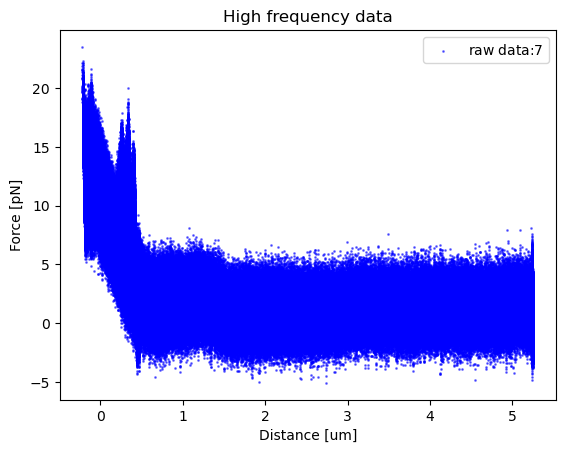

In [12]:
pt = int(ind[0])
plt.scatter(d[0].data, f[0].data, s=1,  color="blue", alpha=0.5, label= r"raw data:${}$". format(pt))
len(distance_1_2.data[s:e])
plt.legend()
plt.title('High frequency data')
plt.ylabel('Force [pN]')
plt.xlabel('Distance [um]')
plt.show()

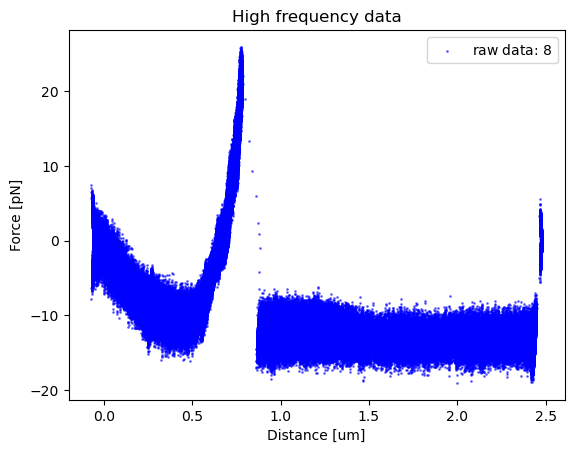

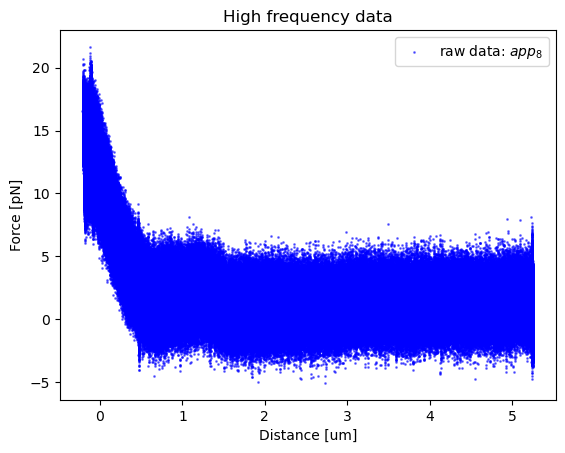

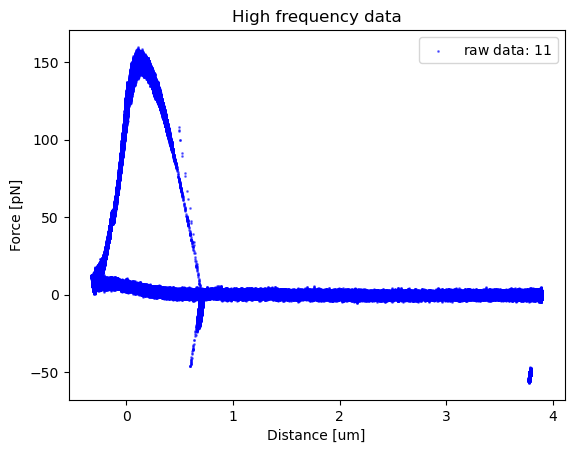

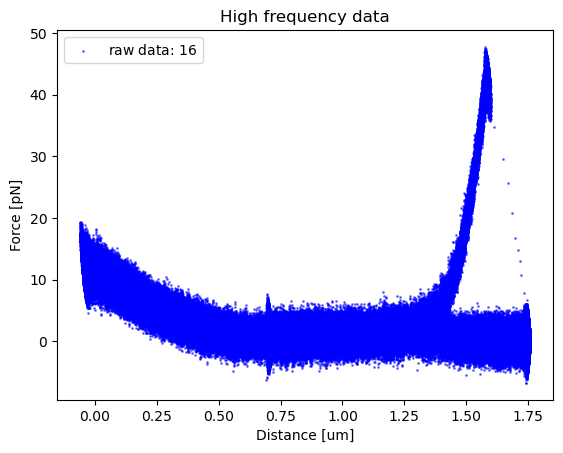

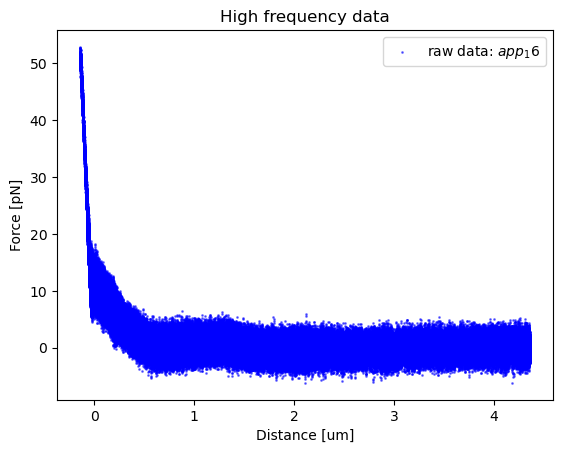

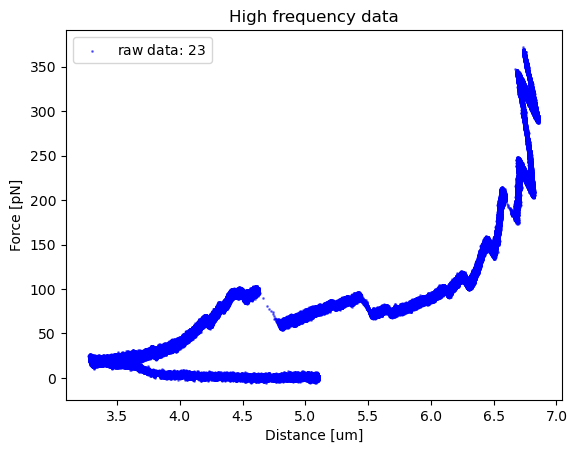

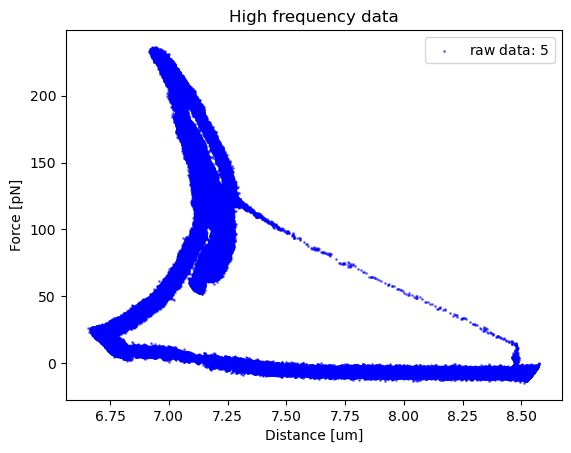

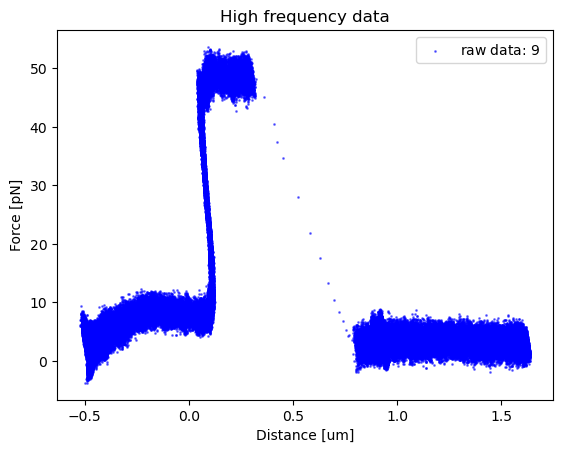

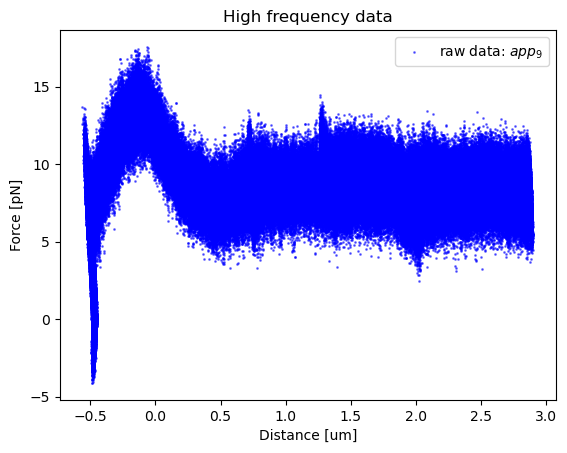

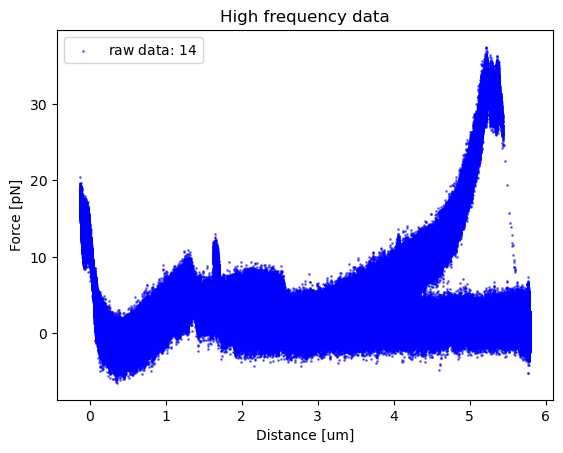

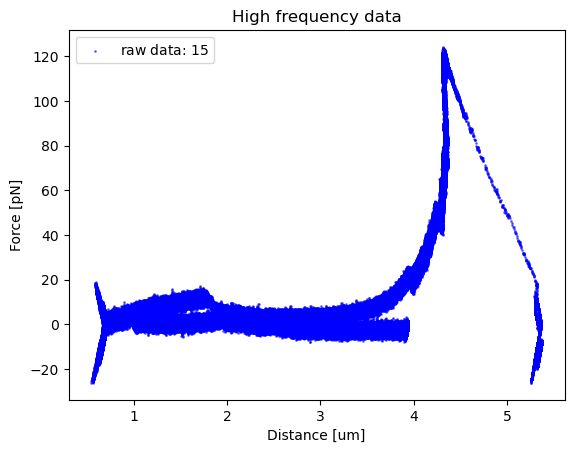

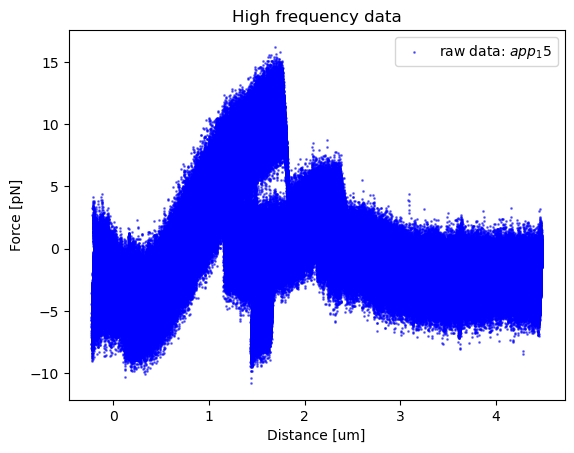

In [176]:
for i in range(1, len(mir133)):
    p = ind[i]
    plt.scatter(d[i].data, f[i].data, s=1,  color="blue", alpha=0.5, label= r"raw data: ${}$". format(p))
    plt.legend()
    plt.title('High frequency data')
    plt.ylabel('Force [pN]')
    plt.xlabel('Distance [um]')
    plt.show()

In [24]:
print(ind)

[7, 8, 'app_8', 11, 16, 'app_16', 23, 5, 9, 'app_9', 14, 15, 'app_15']


# Multiple tethers

OSError: [Errno 22] Can't synchronously read data (file read failed: time = Wed Aug 16 16:09:25 2023
, filename = '\\cmcb-files\jahnel_transitions\Mariia\miR133_223\Fd_curve_02_07_23\20230802-152912 FD Curve 1.h5', file descriptor = 3, errno = 22, error message = 'Invalid argument', buf = 000001E9BCD18040, total read size = 1757480, bytes this sub-read = 1757480, bytes actually read = 18446744073709551615, offset = 117981)

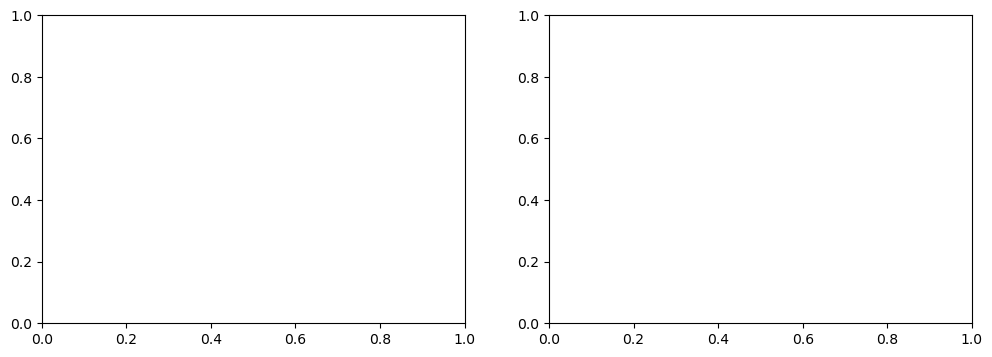

In [42]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))
ax[0].scatter(distance_1_1.data[s:e], force_2x_1.data[s:e], s=1, alpha=0.5, label = 'miRNA-223')

ax[0].set_title('High frequency data')
ax[0].set_ylabel('Force [pN]')
ax[0].set_xlabel('Distance [um]')


ax[1].scatter(d[6].data[s//10:e], f[6].data[s//10:e], s=1, alpha=0.5, label = 'miRNA-133')

ax[1].set_title('High frequency data')
ax[1].set_ylabel('Force [pN]')
ax[1].set_xlabel('Distance [um]')
for i in range(2):
    ax[i].legend()
    ax[i].grid()


# Number 8


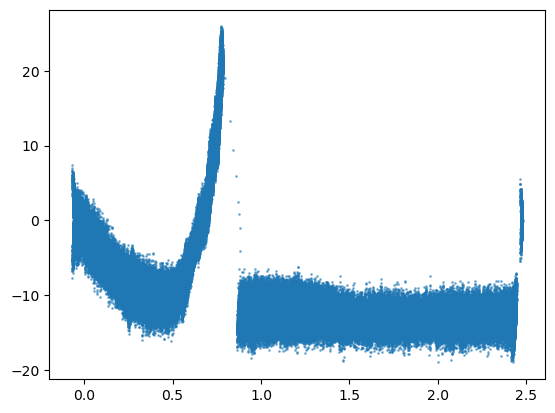

In [12]:
plt.scatter(d[1].data, f[1].data, s=1, alpha=0.5)
# plt.scatter(d[1].data, f[1].data, s=1,  color="blue", alpha=0.5)

In [29]:
def downsampled(force, distance, rate):
    downsampled_rate = rate # Hz
    sample_rate = force.sample_rate

    time = (force.timestamps - force.timestamps[0]) /1e9
    force_downsamp = force.downsampled_by(int(sample_rate/downsampled_rate))
    time_downsampled = (force_downsamp.timestamps- force_downsamp.timestamps[0]) /1e9

    time_d = (distance.timestamps- distance.timestamps[0]) /1e9
    distance_downsamp = distance.downsampled_by(int(sample_rate/downsampled_rate))
    time_downsampled_d = (distance_downsamp.timestamps- distance_downsamp.timestamps[0]) /1e9
    return distance_downsamp, force_downsamp

In [31]:
dis_down = []
forc_down = []
ind3 = np.array([1, 2, 4, 5])
for i in ind3:
    dis, forc = downsampled(f[i],d[i], 100)
    dis_down.append(dis)
    dis_down.append(forc)

    

OSError: [Errno 22] Can't synchronously read data (file read failed: time = Wed Aug 16 05:53:12 2023
, filename = '\\cmcb-files\jahnel_transitions\Mariia\miR133_223\Fd_curve_02_07_23\20230802-160933 FD Curve 8.h5', file descriptor = 6, errno = 22, error message = 'Invalid argument', buf = 000001E9BCBDA040, total read size = 1812705, bytes this sub-read = 1812705, bytes actually read = 18446744073709551615, offset = 52498724)

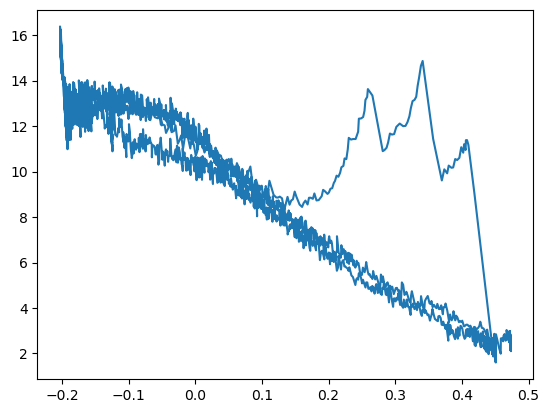

In [38]:
en = len(dis_down.data)
plt.plot(dis_down.data[:en-4000], forc_down.data[:en-4000])